### CS224N 2020 Winter A5

### 1.a 
Convolutional architectures can operate over variable length inputs. Because the model parameters is also independent of the length of the input sentence.

### 1.b
The size of padding is 1, so as to make the smallest possible of $m_\text{word}=1$ to fit in at least one window: $m_\text{word}+2+(2*\text{padding})=5$.

### 1.c
It doesn't matter whether to initialize the $b_\text{gate}$ term positive or negative, because the gradient signal of a sigmoid is $\sigma (1-\sigma)$ and it will have the same back propogation effect to the inner linear layer.

### 1.d
* The computation of Transformer can be easily parallelled for GPU computing.
* Transformer doesn't have the vanishing gradient problem when operating on long sequence.

### 1.f Sanity checks for Highway module
* Test the input/output of a small 'Highway' instance; 
* Test the shape of every intermediate steps;

Given that the mudule is defined by standard torch nn modules such as nn.Linear, nn.ReLU, nn.Sigmoid and nn.Sequential etc, it is sufficient to just check the input and output shapes. The check of intermediate output shapes is needed when the whole Highway model cannot be evaluated successfully. The code is as following, all sanity checks are passed.

In [ ]:
def testHighway():
    size = 5

    hw = Highway(size)
    t = torch.randn((5,5))

    xproj = hw.ReLU_W_proj(t)
    assert t.size() == xproj.size()
    print("Sanity Check xproj shape for highway passed")

    xgate = hw.Sigmoid_W_gate(t)
    assert t.size() == xgate.size()
    print("Sanity Check xgate shape for highway passed")

    x_highway = xproj * xgate +(1 - xgate) * t
    assert t.size() == x_highway.size()
    print("Sanity Check x_highway shape for highway passed")

    out = hw(t)    
    assert t.size() == out.size()
    print("Sanity Check Input/Output shape for highway passed")

### 1.g Sanity checks for CNN mudule
Similar to the above question, the sanity check is mainly focused on shapes:
* Test the input/output of a small 'CNN' instance; 
* Test the shape of every intermediate steps;

The reason is that the module is largely built upon standard torch nn modules such as nn.Conv1d, nn.Relu and nn.Sequential; the check of input/output shapes is already good enough to make sure the module is working correctly. Sanity check code is given below.

In [ ]:
def testCNN():
    in_channel= 5
    out_channel = 4
    k = 2

    cnn = CNN(in_channel, k, out_channel)
    input = torch.randn((1,5,1))
    
    t = cnn.Conv1d(input)
    assert torch.Size([1, out_channel,k]) == t.size()
    print("Sanity Check conv1d shape passed for CNN")

    t = torch.max(t, dim=2)[0]
    assert torch.Size([1, out_channel]) == t.size()
    print("Sanity Check maxpool shape passed for CNN")

    out = cnn(input)
    assert torch.Size([1, out_channel]) == out.size()
    print("Sanity Check Input/Output shape passed for CNN")

### 2.e BLEU value
BLEU value: 36.3863196825431

### 3.a 
* "traducir" and "traduce" are in vocabulary.
* For word based NMT, the normal language 'traduzco', 'traduces', 'traduca', 'traducas' are not in vocabulary means it will have no embeddings, aka the 'OOV' problem; hence an 'unk' embedding is used as source language. Obvious this is not going to work.
* The new character-aware NMT model will overcome this problem because it has no 'OOV' problem.

### 3.b.i The single nearest word and screenshot of 10 nearest words for Word2Vec
• financial: economic
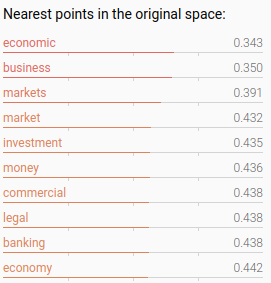

• neuron: nerve
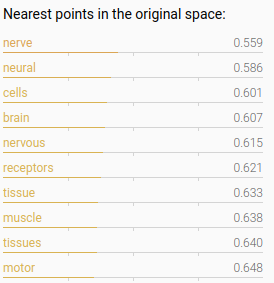

• Francisco: san
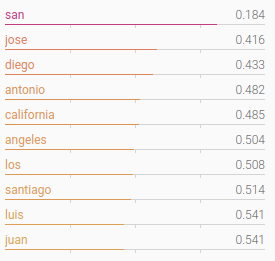

• naturally: occurring
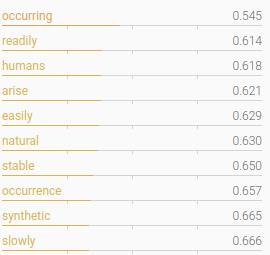

• expectation: norms
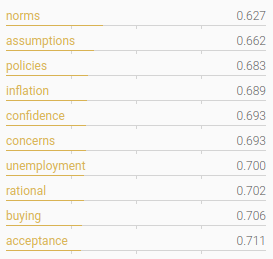



### 3.b.ii The single nearest word and screenshot of 10 nearest words for racter-based word embeddings

• financial: vertical
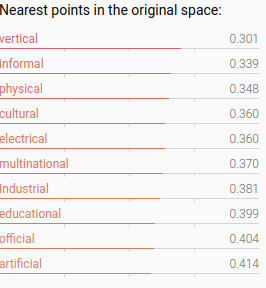

• neuron: newton
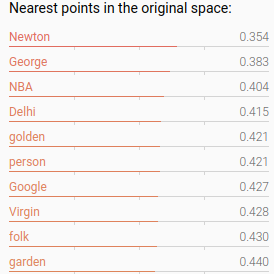

• Francisco: France
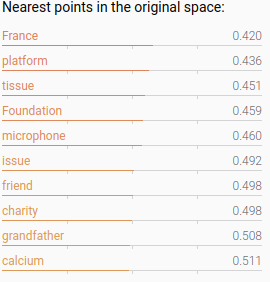

• naturally: practically
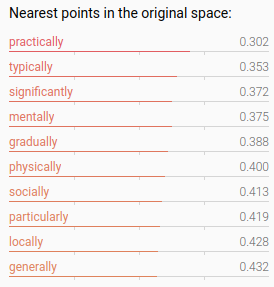

• expectation: exception
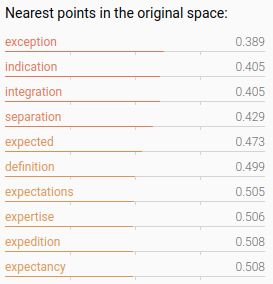



### 3.b.iii Compare the two closest neighbors 
* Word2Vec captures the similarity of word meanings, while CharCNN captures the similarity of the word spelling;
* Word2Vec vectors are trained based on context similarity, similar words appear in similar context, and hence have closer distance; while CharCNN is merely looking into character sequence; similar character sequence will have closer distance. Characters by themselves don't have much semantical meaning.

### 3.c 
1. acceptable translation
  * source: Bien, al da siguiente estbamos en Cleveland.
  * reference: Well, the next day we were in Cleveland.
  * translation in a4: Well, the next day we were in $\text{<unk>}$
  * translation in a5: Well, the next day we were at Cleveland.
  * this is acceptible translation. CharCNN is able to capture the context of the missing 'Cleverland' and generate correct OOV word.  
  
    
2. incorrect translation
  * source: Estoy desilusionada que de adultos nunca llegamos a conocernos.
  * reference: I'm disappointed  that we never got to know each other as adults.
  * translation in a4: I'm $\text{<unk>}$ that we have never come to know us.
  * translation in a5: I'm disillusioned that adults never meet us.
  * this is incorrect translation: The CharCNN is able to capture the similarity of spellings of words; disillusioned and disappointed are close to each in CharCNN encoding, but the meaning are very different.
